In [88]:
import sys
import sklearn 
import numpy as np
np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import urllib.request
from pathlib import Path

from sklearn import preprocessing
from sklearn import pipeline

plt.style.use("dark_background")

In [50]:
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")

In [51]:
lifesat.head(3)

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5


In [52]:
x= lifesat[lifesat.columns[-2]].values.reshape(-1,1)
y= lifesat[lifesat.columns[-1]].values.reshape(-1,1)


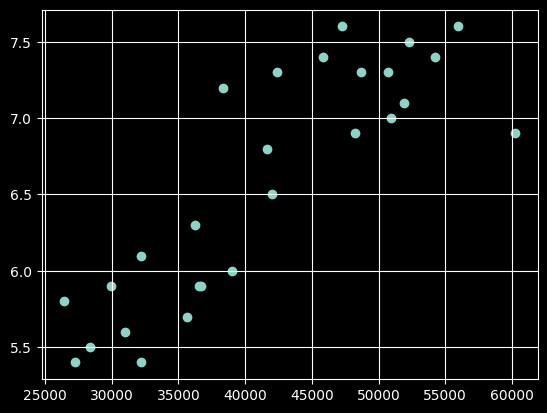

In [53]:
plt.scatter(x, y)
plt.grid(True)
plt.show()

In [54]:
model= LinearRegression()
model.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [55]:
x_new= np.array([37_655.2]).reshape(-1,1)
print(f"Prediction based on a simple linear regressor is: {model.predict(x_new)}")

Prediction based on a simple linear regressor is: [[6.30165767]]


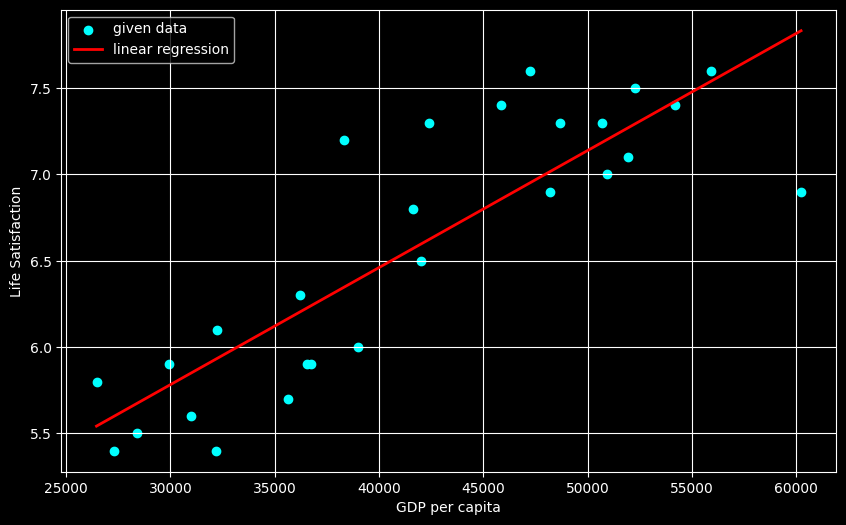

coefficient or slope: 0.000068
Intercept: 3.749049
equation: y = 0.000068x + 3.749049


In [56]:
## lets visualize the linear model
x_plot= np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_plot= model.predict(x_plot)

plt.figure(figsize= (10,6))
plt.scatter(x, y, color= 'cyan', label= 'given data')
plt.plot(x_plot, y_plot, color= 'red', linewidth= 2, label= 'linear regression')
plt.xlabel("GDP per capita")
plt.ylabel("Life Satisfaction")
plt.legend()
plt.grid(True)
plt.show()

# display some model paramters as well: slot and intercept in this case
print(f"coefficient or slope: {model.coef_[0][0]:.6f}")
print(f"Intercept: {model.intercept_[0]:.6f}")
print(f"equation: y = {model.coef_[0][0]:.6f}x + {model.intercept_[0]:.6f}")

```
Lets do K nearest neighbor in place of Linear regression
```

In [57]:
from sklearn.neighbors import KNeighborsRegressor

In [58]:
n_neighbors = 3
model = KNeighborsRegressor(n_neighbors= n_neighbors)

In [59]:
model.fit(x, y)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [60]:
print(f"prediction based on a nearest neighbor model is :{model.predict(x_new)} ")

prediction based on a nearest neighbor model is :[[6.33333333]] 


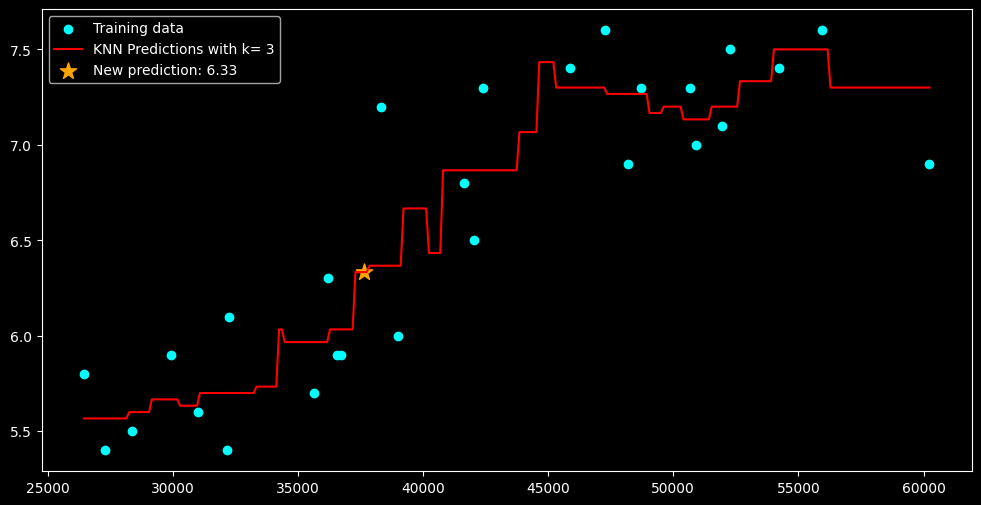

In [61]:
## Visualize the KNN model 
x_plot= np.linspace(x.min(), x.max(), 300).reshape(-1, 1)
y_plot= model.predict(x_plot)


plt.figure(figsize= (12, 6))
plt.scatter(x, y, color= 'cyan', label= "Training data")
plt.plot(x_plot, y_plot, color= 'red', label= f"KNN Predictions with k= {n_neighbors}")
x_new= np.array([37655.2]).reshape(-1, 1)
y_new_pred= model.predict(x_new)
plt.scatter(x_new, y_new_pred, color= 'orange', s= 150, marker= "*", label= f"New prediction: {y_new_pred[0][0]:.2f}")

plt.legend()
plt.show()

In [62]:
datapath= Path() / "datasets" / "lifesat"
datapath.mkdir(parents= True, exist_ok= True)

data_root= "https://github.com/ageron/data/raw/main/"

for filename in ("oecd_bli.csv", "gdp_per_capita.csv"):
    if not (datapath /  filename).is_file():
        print(f"Downloading {filename}")
        url= data_root + "lifesat/" + filename
        urllib.request.urlretrieve(url, datapath / filename)

In [63]:
oecd_bli= pd.read_csv(datapath/ "oecd_bli.csv")
gdp_per_capita= pd.read_csv(datapath / "gdp_per_capita.csv")

In [64]:
gdp_year= 2020
gdppc_col = gdp_per_capita.columns[-1]
lifesat_col= "Life satisfaction"

gdp_per_capita= gdp_per_capita[gdp_per_capita["Year"] == gdp_year]
gdp_per_capita = gdp_per_capita.drop(["Code", "Year"], axis= 1)
gdp_per_capita.columns = ["Country", gdppc_col]
gdp_per_capita.set_index("Country", inplace= True)

gdp_per_capita.head(2)

,"GDP per capita, PPP (constant 2017 international $)"
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670


In [65]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
oecd_bli = oecd_bli.pivot(index= "Country", columns= "Indicator", values= "Value")
oecd_bli.head(2)

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0


In [66]:
## merging the two DataFrames
full_country_stats= pd.merge(left= oecd_bli, right= gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by = gdppc_col, inplace= True)
full_country_stats= full_country_stats[[gdppc_col, lifesat_col]]
full_country_stats.head(2)

,"GDP per capita, PPP (constant 2017 international $)",Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3


In [67]:
min_gdp= 23500
max_gdp= 62500

country_stats= full_country_stats[(full_country_stats[gdppc_col] >= min_gdp) & (full_country_stats[gdppc_col]<= max_gdp)]

country_stats.head()

,"GDP per capita, PPP (constant 2017 international $)",Life satisfaction
Country,,
Russia,26456.387938,5.8
Greece,27287.083401,5.4
Turkey,28384.987785,5.5
Latvia,29932.493910,5.9
Hungary,31007.768407,5.6


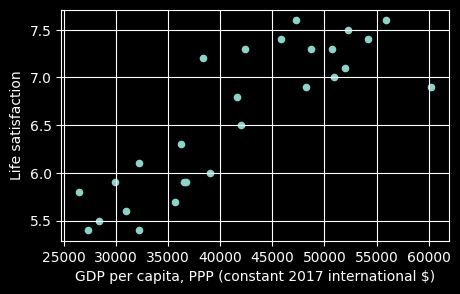

In [68]:
country_stats.plot(kind= 'scatter', figsize= (5,3), grid= True, x= gdppc_col, y =lifesat_col)

min_life_sat= 4
max_life_sat= 9

position_text= {
    
}

In [69]:
x_sample= country_stats[gdppc_col].values.reshape(-1,1)
print(x_sample.shape)

y_sample= country_stats[lifesat_col].values.reshape(-1,1)
print(y_sample.shape)

(27, 1)
(27, 1)


In [70]:
lin1 = LinearRegression()
lin1.fit(x_sample, y_sample)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [71]:
t0, t1= lin1.intercept_[0], lin1.coef_.ravel()[0]

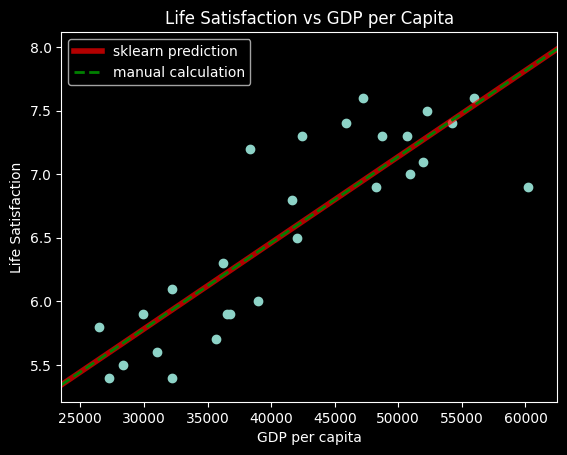

In [86]:
plt.scatter(country_stats[gdppc_col], country_stats[lifesat_col])
x= np.linspace(min_gdp, max_gdp, 100).reshape(-1,1)

plt.plot(x, lin1.predict(x), color= "red", linewidth= 4, alpha= 0.7, label= "sklearn prediction")
plt.plot(x, t0 + t1 *x, color= "green", linewidth= 2, linestyle= "--", label= "manual calculation")

plt.xlabel("GDP per capita")
plt.ylabel("Life Satisfaction")

plt.title("Life Satisfaction vs GDP per Capita")
plt.xlim(min_gdp, max_gdp)
plt.legend()
plt.show()

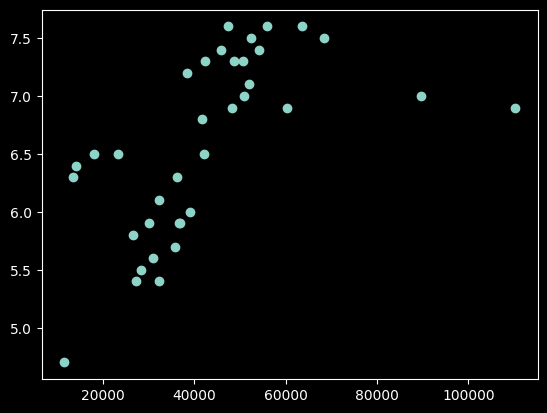

In [ ]:
plt.scatter(full_country_stats[gdppc_col], full_country_stats[lifesat_col])
poly= preprocessing.PolynomialFeatures(degree= 10, include_bias= False)
scaler= preprocessing.StandardScaler()
lin_reg2= LinearRegression()

pipeline_reg= pipeline.Pipeline([
    ('poly', poly),
    ('scal': scaler),
    ('lin', lin_reg2)])
pipeline_reg.fit(full_country_stats[gdppc_col], full_country_stats[lifesat_col])

